<a href="https://colab.research.google.com/github/Franulo/DeepLearningJourney/blob/main/03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have more than two different classes, it's mulit-class classification.

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Text(0.5, 1.0, '9')

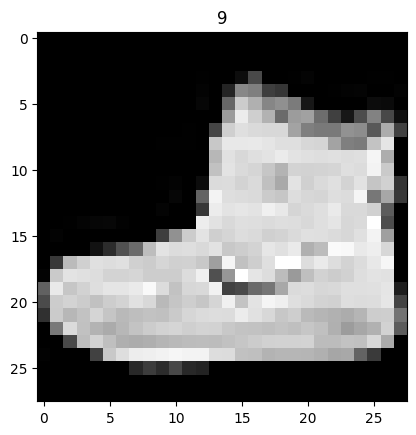

In [ ]:
plt.imshow(train_data[0], cmap='gray')
plt.title(train_labels[0])

In [ ]:
# Index outo our training labels
class_names =  ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

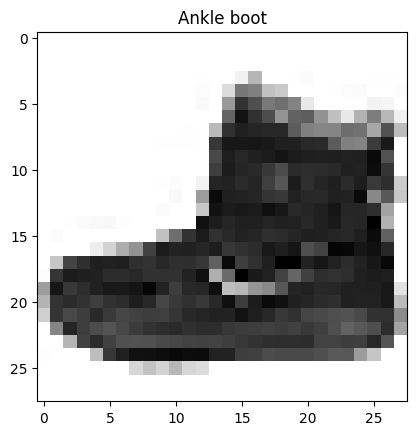

In [ ]:
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])

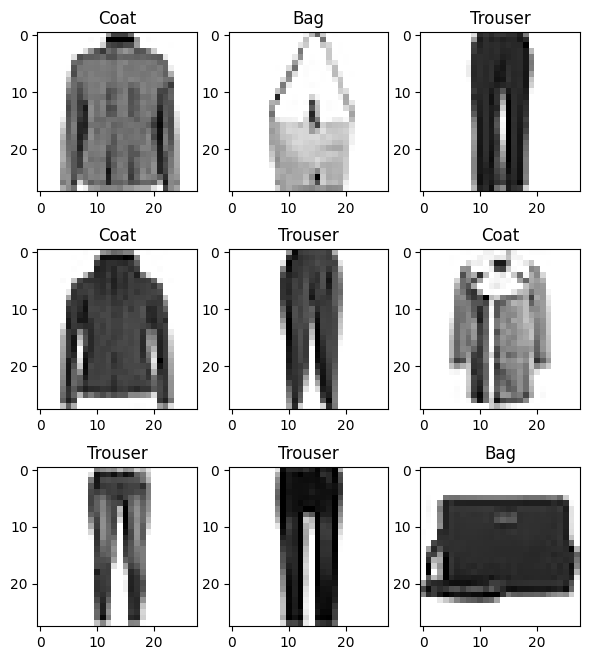

In [ ]:
import random
plt.figure(figsize=(7, 8))
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = (28, 28) (the shape of one image)
* Output shape = (10) (one per class)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# our data needs to be flattened (from 28, 28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28 * 28

784

Shape errors with the model look at:
* Input-shape
* Output-shape
* Loss-Function
- maybe use tf.keras.Flatten(), change the loss function or reshape output/input data

In [ ]:
# Set random seed
tf.keras.utils.set_random_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)),
                               verbose=0)

In [ ]:
# Check the model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<Axes: >

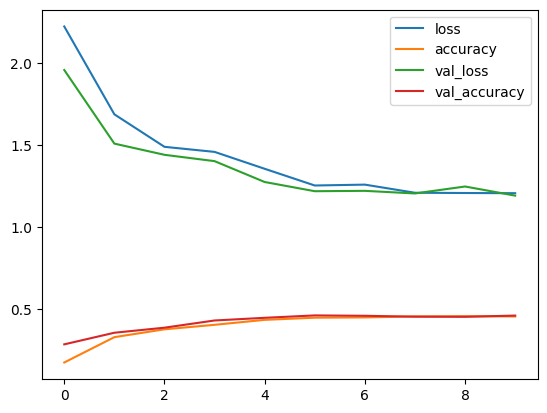

In [ ]:
pd.DataFrame(non_norm_history.history).plot()

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

**Neural networks prefer data to be scaled (or normalized), it means they like to have the numbers in the tensor to be between 0 and 1.**

In [ ]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# Check min and max of normalized data
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [ ]:
# Set random seed
tf.keras.utils.set_random_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                           tf.one_hot(train_labels, depth=10),
                           epochs=10,
                           validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                           verbose=0)

(0.0, 2.5)

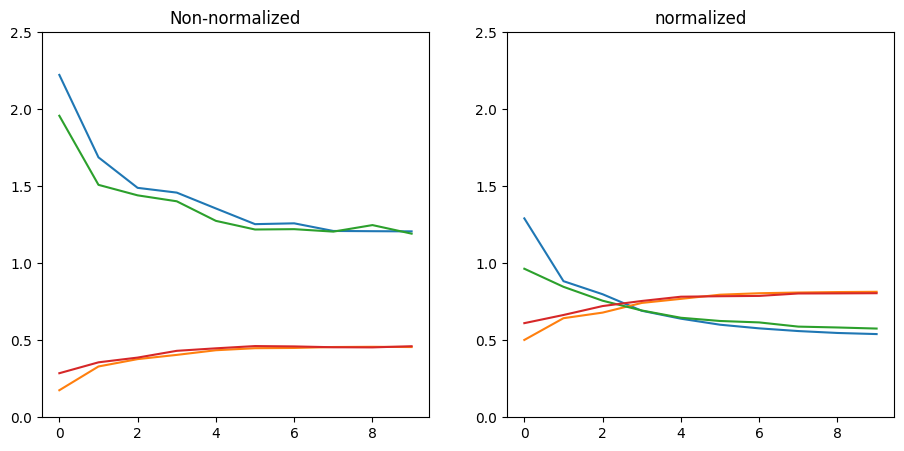

In [37]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.title("Non-normalized")
plt.plot(pd.DataFrame(non_norm_history.history))
plt.ylim(0, 2.5)
plt.subplot(1, 2, 2)
plt.title("normalized")
plt.plot(pd.DataFrame(norm_history.history))
plt.ylim(0, 2.5)

**Note:** The same model with even  *slightly* different data can produce *dramatically* different results. So when  you're comparing models, it's important to make sure you're comparing them on the same citeria (e.g same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [58]:
# Set random seed
tf.keras.utils.set_random_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_3 = model_3.fit(train_data_norm,
                      tf.one_hot(train_labels, depth=10),
                      epochs=40,
                      validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                      verbose=2,
                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 - 6s - loss: 1.2915 - accuracy: 0.5021 - val_loss: 0.9645 - val_accuracy: 0.6112 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 2/40
1875/1875 - 7s - loss: 0.8796 - accuracy: 0.6454 - val_loss: 0.8428 - val_accuracy: 0.6661 - lr: 0.0011 - 7s/epoch - 4ms/step
Epoch 3/40
1875/1875 - 3s - loss: 0.7519 - accuracy: 0.7072 - val_loss: 0.7093 - val_accuracy: 0.7341 - lr: 0.0013 - 3s/epoch - 2ms/step
Epoch 4/40
1875/1875 - 6s - loss: 0.6611 - accuracy: 0.7554 - val_loss: 0.6712 - val_accuracy: 0.7762 - lr: 0.0014 - 6s/epoch - 3ms/step
Epoch 5/40
1875/1875 - 8s - loss: 0.6079 - accuracy: 0.7913 - val_loss: 0.6152 - val_accuracy: 0.7956 - lr: 0.0016 - 8s/epoch - 4ms/step
Epoch 6/40
1875/1875 - 9s - loss: 0.5770 - accuracy: 0.8035 - val_loss: 0.6442 - val_accuracy: 0.7796 - lr: 0.0018 - 9s/epoch - 5ms/step
Epoch 7/40
1875/1875 - 8s - loss: 0.5591 - accuracy: 0.8086 - val_loss: 0.5815 - val_accuracy: 0.8028 - lr: 0.0020 - 8s/epoch - 4ms/step
Epoch 8/40
1875/1875 - 6s - loss: 0.5470 

Text(0, 0.5, 'Loss')

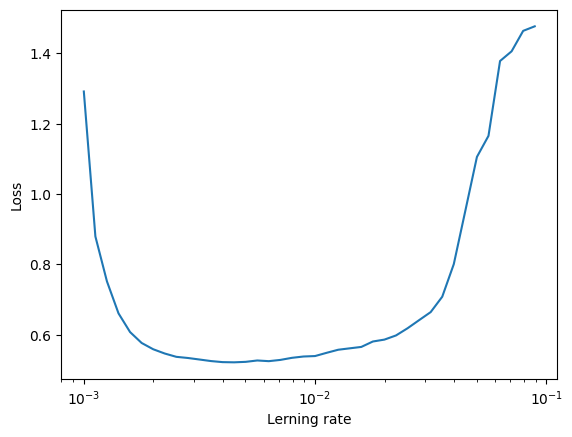

In [59]:
plt.semilogx(1e-3 * (10**(tf.range(40)/20)), history_3.history["loss"])
plt.xlabel("Lerning rate")
plt.ylabel("Loss")

Ideal: about 0.001

In [60]:
# Set random seed
tf.keras.utils.set_random_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_norm,
                      tf.one_hot(train_labels, depth=10),
                      epochs=40,
                      validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)),
                      verbose=2)

Epoch 1/40
1875/1875 - 5s - loss: 1.2915 - accuracy: 0.5021 - val_loss: 0.9645 - val_accuracy: 0.6112 - 5s/epoch - 3ms/step
Epoch 2/40
1875/1875 - 4s - loss: 0.8838 - accuracy: 0.6434 - val_loss: 0.8471 - val_accuracy: 0.6642 - 4s/epoch - 2ms/step
Epoch 3/40
1875/1875 - 3s - loss: 0.7990 - accuracy: 0.6797 - val_loss: 0.7569 - val_accuracy: 0.7222 - 3s/epoch - 2ms/step
Epoch 4/40
1875/1875 - 5s - loss: 0.6917 - accuracy: 0.7425 - val_loss: 0.6935 - val_accuracy: 0.7552 - 5s/epoch - 2ms/step
Epoch 5/40
1875/1875 - 4s - loss: 0.6402 - accuracy: 0.7689 - val_loss: 0.6462 - val_accuracy: 0.7829 - 4s/epoch - 2ms/step
Epoch 6/40
1875/1875 - 4s - loss: 0.6011 - accuracy: 0.7960 - val_loss: 0.6253 - val_accuracy: 0.7860 - 4s/epoch - 2ms/step
Epoch 7/40
1875/1875 - 4s - loss: 0.5774 - accuracy: 0.8055 - val_loss: 0.6160 - val_accuracy: 0.7881 - 4s/epoch - 2ms/step
Epoch 8/40
1875/1875 - 4s - loss: 0.5599 - accuracy: 0.8101 - val_loss: 0.5887 - val_accuracy: 0.8039 - 4s/epoch - 2ms/step
Epoch 9/

from platform import architecture
## Evaluation our multi-class classification model

To evaluate our multi-classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (trough visualizations)
* Improve its results (by training it for longer or changing the architecture or data)
* Save and export it for use in an application

Text(0.5, 0, 'epochs')

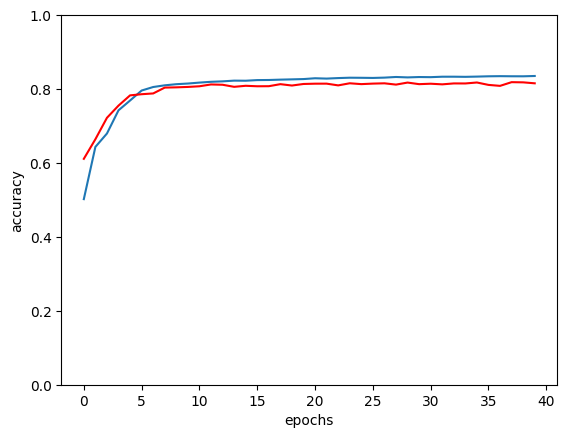

In [61]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'], color="Red")
plt.ylim(0, 1)
plt.ylabel("accuracy")
plt.xlabel("epochs")

In [103]:
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_preds, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  # Set x_axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.2f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [79]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [88]:
model_4.evaluate(test_data_norm, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 2s 5ms/step - loss: 0.5343 - accuracy: 0.8155


[0.5343137979507446, 0.815500020980835]

In [94]:
probs_labels = model_4.predict(test_data_norm) # probs is short for "prediction probalities"
probs_labels[0], class_names[tf.argmax(probs_labels[0])]

313/313 [==============================] - 1s 4ms/step


(array([2.2628474e-11, 1.2140724e-13, 3.1525876e-12, 3.5178633e-07,
        9.4103719e-08, 4.0394217e-01, 1.0224852e-11, 1.5581870e-01,
        2.5360996e-03, 4.3770257e-01], dtype=float32),
 'Ankle boot')

In [100]:
pred_labels = tf.argmax(probs_labels, axis=1)
test_labels.shape, pred_labels.shape

((10000,), TensorShape([10000]))

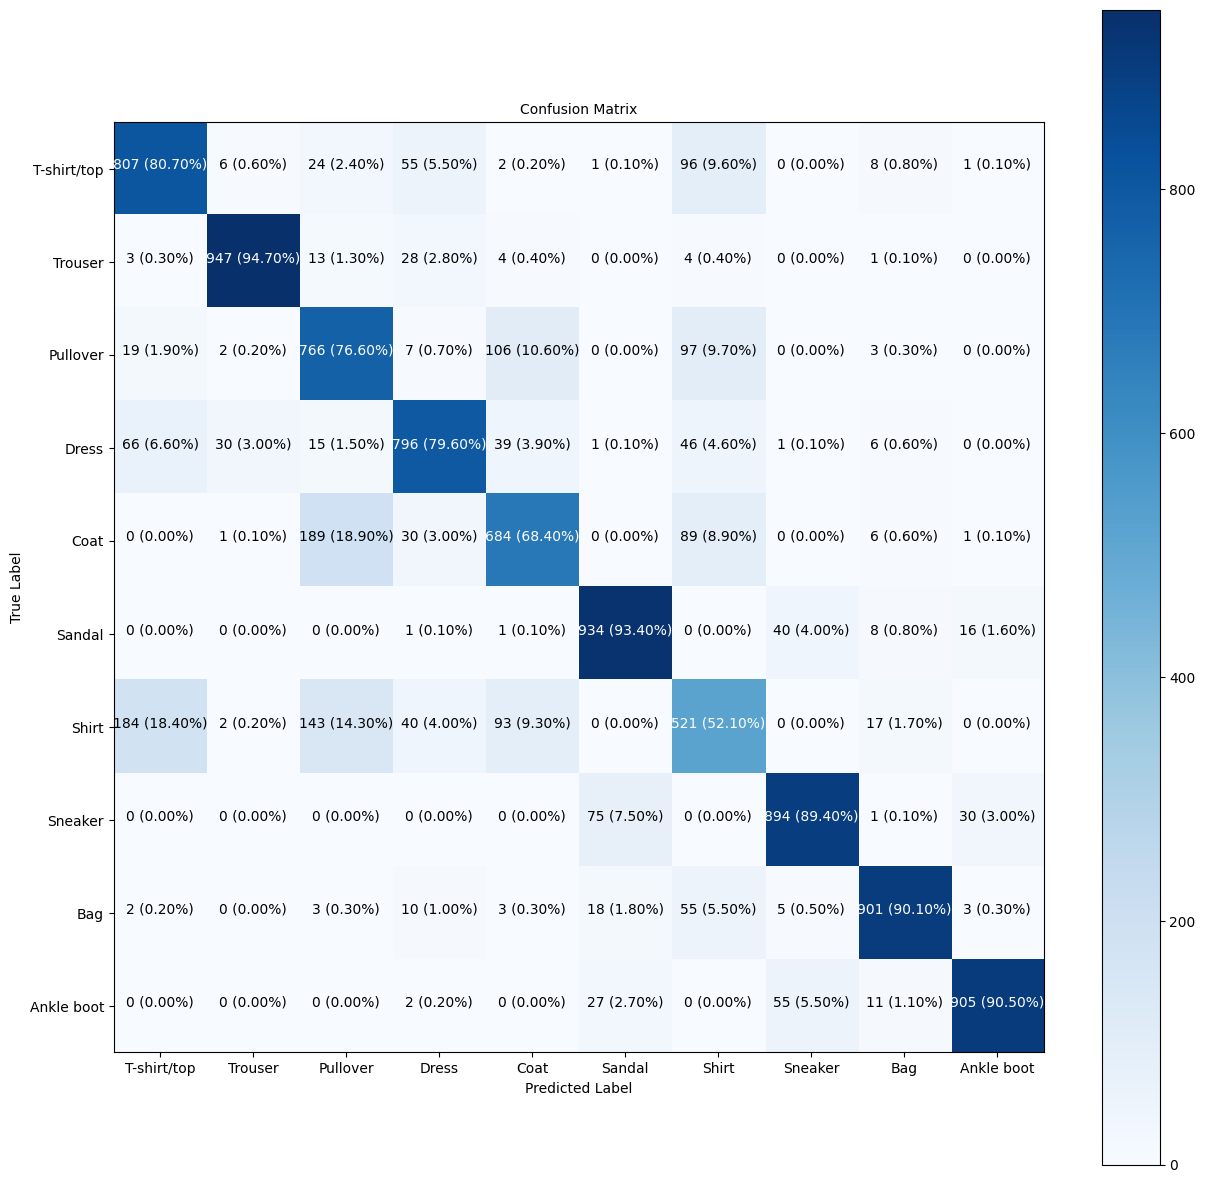

In [108]:
plot_confusion_matrix(y_true=test_labels,
                      y_preds=pred_labels,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visulize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [111]:
test_data.shape

(10000, 28, 28)

In [170]:
import random

def predict_random_image(model, x, y_true, classes):
  random_number = random.randint(0, 9999)

  probs_labels = model.predict(x)
  pred_labels = tf.argmax(probs_labels, axis=1)
  pred_label = class_names[pred_labels[random_number]]
  true_label = class_names[y_true[random_number]]

  plt.imshow(test_data[random_number], cmap=plt.cm.binary)

  color = None

  if pred_label == true_label:
    color="Green"
  else:
    color="Red"

  plt.xlabel(f"Pred: {pred_label} (True: {true_label})", color=color)

In [137]:
test_labels.shape

(10000,)

313/313 [==============================] - 1s 2ms/step


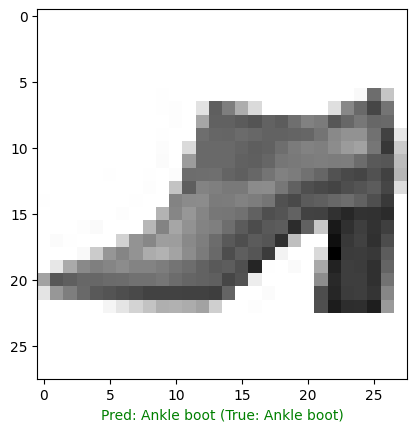

In [183]:
predict_random_image(model_4, test_data_norm, test_labels, class_names)